In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import aliased
from sqlalchemy.inspection import inspect
from sqlalchemy import or_
from sqlalchemy import and_

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x16312b5db00>,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [12]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x16312ba7860>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [14]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.prcp, Measurement.station, Measurement.tobs, Measurement.date, Measurement.id).filter(and_(Measurement.date < '2017-08-24', Measurement.date > '2016-08-22')).all()
for row in results:
        print(row)
    

(0.0, 'USC00519397', 81.0, '2016-08-23', 2364)
(0.08, 'USC00519397', 79.0, '2016-08-24', 2365)
(0.08, 'USC00519397', 80.0, '2016-08-25', 2366)
(0.0, 'USC00519397', 79.0, '2016-08-26', 2367)
(0.0, 'USC00519397', 77.0, '2016-08-27', 2368)
(0.01, 'USC00519397', 78.0, '2016-08-28', 2369)
(0.0, 'USC00519397', 78.0, '2016-08-29', 2370)
(0.0, 'USC00519397', 79.0, '2016-08-30', 2371)
(0.13, 'USC00519397', 80.0, '2016-08-31', 2372)
(0.0, 'USC00519397', 81.0, '2016-09-01', 2373)
(0.0, 'USC00519397', 80.0, '2016-09-02', 2374)
(0.0, 'USC00519397', 79.0, '2016-09-03', 2375)
(0.03, 'USC00519397', 75.0, '2016-09-04', 2376)
(None, 'USC00519397', 79.0, '2016-09-05', 2377)
(None, 'USC00519397', 76.0, '2016-09-06', 2378)
(0.05, 'USC00519397', 76.0, '2016-09-07', 2379)
(0.0, 'USC00519397', 80.0, '2016-09-08', 2380)
(0.03, 'USC00519397', 79.0, '2016-09-09', 2381)
(0.0, 'USC00519397', 78.0, '2016-09-10', 2382)
(0.05, 'USC00519397', 76.0, '2016-09-11', 2383)
(0.0, 'USC00519397', 78.0, '2016-09-12', 2384)
(0.

(0.15, 'USC00519523', 76.0, '2017-04-18', 12071)
(0.0, 'USC00519523', 74.0, '2017-04-19', 12072)
(0.35, 'USC00519523', 76.0, '2017-04-20', 12073)
(2.36, 'USC00519523', 70.0, '2017-04-21', 12074)
(None, 'USC00519523', 80.0, '2017-04-24', 12075)
(0.0, 'USC00519523', 76.0, '2017-04-25', 12076)
(0.01, 'USC00519523', 81.0, '2017-04-26', 12077)
(0.0, 'USC00519523', 76.0, '2017-04-27', 12078)
(0.0, 'USC00519523', 76.0, '2017-04-28', 12079)
(6.25, 'USC00519523', 70.0, '2017-04-29', 12080)
(1.31, 'USC00519523', 64.0, '2017-04-30', 12081)
(0.07, 'USC00519523', 73.0, '2017-05-01', 12082)
(0.0, 'USC00519523', 78.0, '2017-05-02', 12083)
(0.0, 'USC00519523', 78.0, '2017-05-03', 12084)
(0.0, 'USC00519523', 77.0, '2017-05-04', 12085)
(0.0, 'USC00519523', 79.0, '2017-05-05', 12086)
(0.0, 'USC00519523', 80.0, '2017-05-06', 12087)
(0.0, 'USC00519523', 78.0, '2017-05-07', 12088)
(0.0, 'USC00519523', 80.0, '2017-05-08', 12089)
(0.68, 'USC00519523', 75.0, '2017-05-09', 12090)
(0.06, 'USC00519523', 76.0, '20

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Measurement_Last12Months = pd.DataFrame(results)
# Sort the dataframe by date
#Pandas already sorted it
Measurement_Last12Months.set_index('date',inplace=True)
Measurement_Last12Months.head(10)

,prcp,station,tobs,id
date,,,,
2016-08-23,0.00,USC00519397,81.0,2364
2016-08-24,0.08,USC00519397,79.0,2365
2016-08-25,0.08,USC00519397,80.0,2366
2016-08-26,0.00,USC00519397,79.0,2367
2016-08-27,0.00,USC00519397,77.0,2368
2016-08-28,0.01,USC00519397,78.0,2369
2016-08-29,0.00,USC00519397,78.0,2370
2016-08-30,0.00,USC00519397,79.0,2371
2016-08-31,0.13,USC00519397,80.0,2372


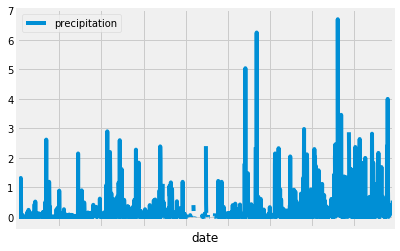

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = Measurement_Last12Months.plot(kind='line', y='prcp')
ax.tick_params(axis = "x", labelbottom = False)
ax.legend(['precipitation'])

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
count = Measurement_Last12Months.prcp.count()
mean = Measurement_Last12Months.prcp.mean()
std = Measurement_Last12Months.prcp.std()
min_value = Measurement_Last12Months.prcp.min()
twenty_five = Measurement_Last12Months.prcp.quantile(0.25)
fifty = Measurement_Last12Months.prcp.quantile(0.50)
seventy_five = Measurement_Last12Months.prcp.quantile(0.75)
max_value = Measurement_Last12Months.prcp.max()

# intialize data of lists. 
data = {'':['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 'Precipitation':[count, mean, std, min_value, twenty_five, fifty, seventy_five, max_value]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
df

,,Precipitation
0,count,2021.000000
1,mean,0.177279
2,std,0.461190
3,min,0.000000
4,25%,0.000000
5,50%,0.020000
6,75%,0.130000
7,max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
Number_Of_Stations = session.query(Station).count()
Number_Of_Stations


9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import desc
active_stations = session.query(func.count(Measurement.id), Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.id).desc())
for record in active_stations:
    print(record)

(2772, 'USC00519281')
(2724, 'USC00519397')
(2709, 'USC00513117')
(2669, 'USC00519523')
(2612, 'USC00516128')
(2202, 'USC00514830')
(1979, 'USC00511918')
(1372, 'USC00517948')
(511, 'USC00518838')


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowest = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').group_by(Measurement.station)
for record in lowest:
    print(record)

(54.0, 85.0, 71.66378066378067)


In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_tobs = session.query(Measurement.prcp, Measurement.station, Measurement.tobs, Measurement.date, Measurement.id).filter(and_(Measurement.date < '2017-08-24', Measurement.date > '2016-08-22')).filter(Measurement.station == 'USC00519281').all()
for row in highest_tobs:
        print(row)

(1.79, 'USC00519281', 77.0, '2016-08-23', 14608)
(2.15, 'USC00519281', 77.0, '2016-08-24', 14609)
(0.06, 'USC00519281', 80.0, '2016-08-25', 14610)
(0.01, 'USC00519281', 80.0, '2016-08-26', 14611)
(0.12, 'USC00519281', 75.0, '2016-08-27', 14612)
(0.6, 'USC00519281', 73.0, '2016-08-28', 14613)
(0.35, 'USC00519281', 78.0, '2016-08-29', 14614)
(0.0, 'USC00519281', 77.0, '2016-08-30', 14615)
(0.24, 'USC00519281', 78.0, '2016-08-31', 14616)
(0.02, 'USC00519281', 80.0, '2016-09-01', 14617)
(0.01, 'USC00519281', 80.0, '2016-09-02', 14618)
(0.12, 'USC00519281', 78.0, '2016-09-03', 14619)
(0.14, 'USC00519281', 78.0, '2016-09-04', 14620)
(0.03, 'USC00519281', 78.0, '2016-09-05', 14621)
(0.11, 'USC00519281', 73.0, '2016-09-06', 14622)
(0.16, 'USC00519281', 74.0, '2016-09-07', 14623)
(0.07, 'USC00519281', 80.0, '2016-09-08', 14624)
(0.16, 'USC00519281', 79.0, '2016-09-09', 14625)
(0.09, 'USC00519281', 77.0, '2016-09-10', 14626)
(0.3, 'USC00519281', 80.0, '2016-09-11', 14627)
(0.31, 'USC00519281', 7

In [23]:
highest_tobs_df = pd.DataFrame(highest_tobs)
highest_tobs_df.head()

,prcp,station,tobs,date,id
0,1.79,USC00519281,77.0,2016-08-23,14608
1,2.15,USC00519281,77.0,2016-08-24,14609
2,0.06,USC00519281,80.0,2016-08-25,14610
3,0.01,USC00519281,80.0,2016-08-26,14611
4,0.12,USC00519281,75.0,2016-08-27,14612


Text(0.5, 1.0, '')

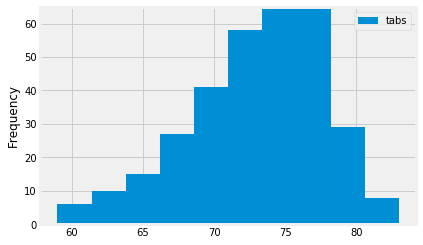

In [24]:
import numpy as np
ax1 = highest_tobs_df.hist(column = 'tobs')
plt.ylim(0,65)
#Reference : https://stackoverflow.com/questions/42832675/setting-axis-labels-for-histogram-pandas
for ax in ax1.flatten():
    ax.set_ylabel("Frequency")
#Reference: https://stackoverflow.com/questions/10557614/matplotlib-figlegend-only-printing-first-letter
plt.legend(("tabs",))
plt.title("")

In [38]:
results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= '2016-09-23').filter(Measurement.date <= '2017-08-20').all()
print(results)

[(58.0, 74.26544735541275, 87.0)]


In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))


[(61.0, 69.75510204081633, 75.0)]


Text(0.5, 1.0, 'Trip Avg Temp')

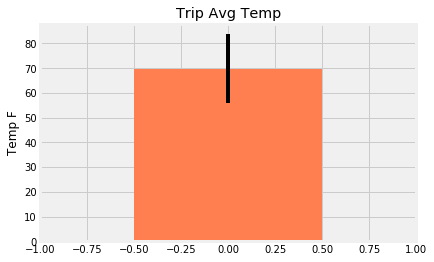

In [29]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avg_temp = calc_temps('2011-02-28', '2011-03-05')[0][1]
# min_value = 61.4
# max_value = 75.2
min_value = calc_temps('2011-02-28', '2011-03-05')[0][0]
max_value = calc_temps('2011-02-28', '2011-03-05')[0][2]
error = (min_value, max_value)

plt.bar(0, avg_temp, width = 1, yerr = (max_value-min_value), color = 'coral')
plt.xlim(-1, 1)
plt.ylabel('Temp F')
plt.title('Trip Avg Temp')

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
results = session.query(func.Sum(Measurement.prcp), Measurement.station, Measurement.tobs, Station.name, Station.latitude, Station.longitude, Station.elevation).filter(Measurement.station == Station.station).filter(and_(Measurement.date < '2017-08-24', Measurement.date > '2016-08-22')).group_by(Measurement.station).order_by(func.Sum(Measurement.prcp).desc())
for row in results:
        print(row)

(147.81000000000006, 'USC00516128', 74.0, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
(70.03000000000003, 'USC00519281', 77.0, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(48.510000000000026, 'USC00513117', 76.0, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(38.01, 'USC00519523', 80.0, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(33.239999999999995, 'USC00514830', 80.0, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(16.089999999999986, 'USC00519397', 81.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(4.59, 'USC00517948', 80.0, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


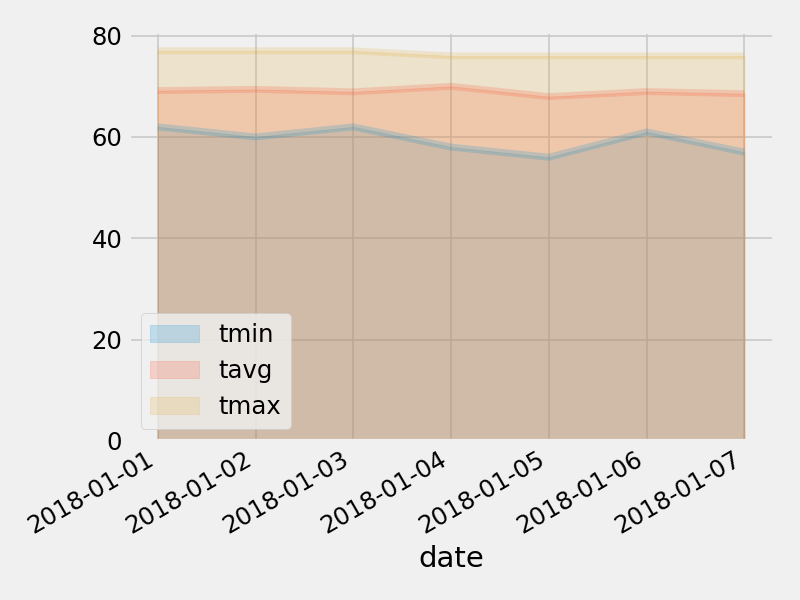

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
